Before setting up your problem you need to know the rules of a game, before each problem the rules of the game will be highlighted

In [1]:
import random           # main package for random number generation
import matplotlib.pyplot as plt # package for plotting
import numpy as np

Let's star with something simple.
You are playing a game where a coin flip value is either heads or tails. Every time you flip heads you double your bet, every time you flip tails you lose your bet. You do this until you are broke or you hit your profit target (profit)

In [43]:
# random.randint(a, b)
def coin_flip_gambling(num_flips, starting_cash, starting_bet, profit_target):
    """
    Simulate a coin flip gambling game.

    Args:
        num_flips (int): Number of coin flips to simulate.
        starting_bet (float): The initial amount of money to start with.
        profit_target (float): The profit target to reach.

    Returns:
        float: Final amount of money after the game ends.
    """
    balance = starting_cash
    total_profit = 0
    total_wins = 0
    for _ in range(num_flips):
        balance = starting_cash     # initialize to starting cash each round
        while ((balance >= 0) and (balance <= (starting_cash + profit_target))):
            flip = random.choice(['H', 'T'])
            # print("balance =", balance, "Has money =", balance >= 0, "missed target =", balance <= (starting_cash + profit_target))
            if flip == 'H':
                # print("Heads", "balance = ", balance)
                balance += starting_bet  # Double the bet
            else:
                # print("Tails", "balance = ", balance)
                balance -= starting_bet  # Lose the bet
        if balance > starting_cash:
            total_wins += 1
        total_profit += (starting_cash - balance)
    # return average profit and win percentage
    return (total_profit / num_flips), (total_wins / num_flips) * 100

def plot_gambling(saved_values):
    """
    Plot the results of the gambling simulation.

    Args:
        saved_values (list): List of final amounts of money after each simulation.
    """
    plt.hist(saved_values, bins=20, edgecolor='black', alpha=0.7)
    plt.title('Gambling Simulation Results')
    plt.xlabel('Final Amount ($)')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

In [41]:
# initialize starting parameters
num_flips = 100
starting_cash = 100
starting_bet = 10
profit_target = 30
# your expected profit from this scenario should be 0
expected_profit, win_percentage = coin_flip_gambling(num_flips, starting_cash, starting_bet, profit_target)
print(f"Expected Profit: ${expected_profit:.2f}, Win Percentage: {win_percentage:.2f}%")

Expected Profit: $-11.50, Win Percentage: 81.00%


Now let's see what happens as we increase the number of simulations

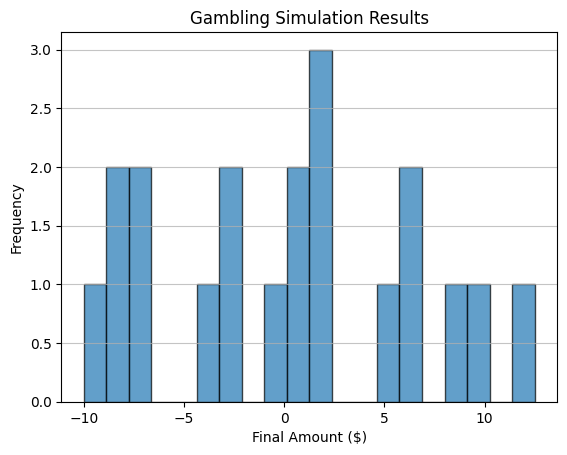

In [47]:
num_flips = 100
starting_cash = 100
starting_bet = 10
profit_target = 30
sims = 20
saved_values = []
for _ in range(sims):
    saved_values.append(coin_flip_gambling(num_flips, starting_cash, starting_bet, profit_target)[0])

plot_gambling(saved_values)

Now let's look at this distribution as we increase the number of iterations within the Monte Carlo

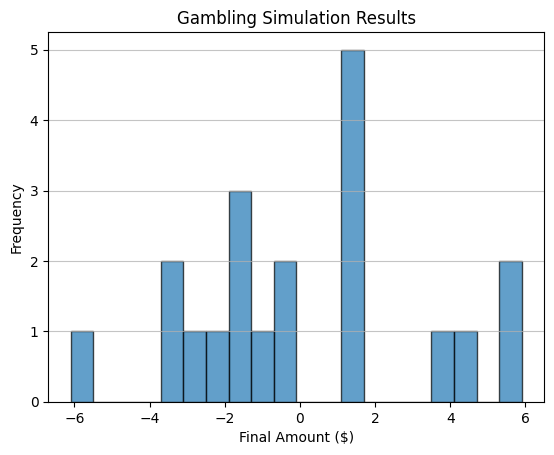

In [48]:
num_flips = 500
starting_cash = 100
starting_bet = 10
profit_target = 30
sims = 20
saved_values = []
for _ in range(sims):
    saved_values.append(coin_flip_gambling(num_flips, starting_cash, starting_bet, profit_target)[0])

plot_gambling(saved_values)

Notice how these are much tighter